In [1]:

!pip install imblearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import time
import collections
import random
import warnings
import csv
import pprint

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, confusion_matrix, precision_score,recall_score, f1_score, roc_auc_score, accuracy_score

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from collections import Counter, OrderedDict

from scipy import stats
from scipy.stats import chi2, norm














bank_data = list(csv.DictReader(open('updated_file_bank.csv')))
pprint.pprint(bank_data[0])
bank_data_columns=csv.DictReader(open('updated_file_bank.csv'))


Job1=[]
Marital1=[]
Education1=[]
Default1=[]
Balance1=[]
Housing1=[]
Loan1=[]
Contact1=[]
Day1=[]
Month1=[]
Duration1=[]
Campaign1=[]
Pdays1=[]
Previous1=[]
P_outcome1=[]
Y1=[]

for col in bank_data_columns:
    Job1.append(col['job'])
    Marital1.append(col['marital'])
    Education1.append(col['education'])
    Default1.append(col['default'])
    Balance1.append(col['balance'])
    Housing1.append(col['housing'])
    Loan1.append(col['loan'])
    Contact1.append(col['contact'])
    Day1.append(col['day'])
    Month1.append(col['month'])
    Duration1.append(col['duration'])
    Campaign1.append(col['campaign'])
    Pdays1.append(col['pdays'])
    Previous1.append(col['previous'])
    P_outcome1.append(col['poutcome'])
    Y1.append(col['y'])
    
    



df1 = pd.read_csv('updated_file_bank.csv')

# cat_columns1 = df1.select_dtypes(['object']).columns


# df1[cat_columns1] = df1[cat_columns1].apply(lambda x: pd.factorize(x)[0])



bank_additional_data = list(csv.DictReader(open('updated_file_bank_additional.csv')))
pprint.pprint(bank_additional_data[0])
bank_additional_data_columns=csv.DictReader(open('updated_file_bank_additional.csv'))


Age2=[]
Job2=[]
Marital2=[]
Education2=[]
Default2=[]
Housing2=[]
Loan2=[]
Contact2=[]
Month2=[]
Day_of_week2=[]
Duration2=[]
Campaign2=[]
Pdays2=[]
Previous2=[]
Poutcome2=[]
Emp_var_rate2=[]
Cons_price_idx2=[]
Cons_conf_idx2=[]
Euribor3m2=[]
Nr_employed2=[]
Y2=[]


for col in bank_additional_data_columns:
    Age2.append(col['age'])
    Job2.append(col['job'])
    Marital2.append(col['marital'])
    Education2.append(col['education'])
    Default2.append(col['default'])
    Housing2.append(col['housing'])
    Loan2.append(col['loan'])
    Contact2.append(col['contact'])
    Month2.append(col['month'])
    Day_of_week2.append(col['day_of_week'])
    Duration2.append(col['duration'])
    Campaign2.append(col['campaign'])
    Pdays2.append(col['pdays'])
    Previous2.append(col['previous'])
    Poutcome2.append(col['poutcome'])
    Emp_var_rate2.append(col['emp.var.rate'])
    Cons_price_idx2.append(col['cons.price.idx'])
    Cons_conf_idx2.append(col['cons.conf.idx'])
    Euribor3m2.append(col['euribor3m'])
    Nr_employed2.append(col['nr.employed'])
    Y2.append(col['y'])



df2 = pd.read_csv('updated_file_bank_additional.csv')

# cat_columns2 = df2.select_dtypes(['object']).columns


# df2[cat_columns2] = df2[cat_columns2].apply(lambda x: pd.factorize(x)[0])










{'balance': '1787',
 'campaign': '1',
 'contact': 'cellular',
 'day': '19',
 'default': 'no',
 'duration': '79',
 'education': 'primary',
 'housing': 'no',
 'job': 'unemployed',
 'loan': 'no',
 'marital': 'married',
 'month': 'oct',
 'pdays': '-1',
 'poutcome': 'unknown',
 'previous': '0',
 'y': 'no'}
{'age': '57',
 'campaign': '1',
 'cons.conf.idx': '-36.4',
 'cons.price.idx': '93.994',
 'contact': 'telephone',
 'day_of_week': 'mon',
 'default': 'unknown',
 'duration': '149',
 'education': 'high.school',
 'emp.var.rate': '1.1',
 'euribor3m': '4.857',
 'housing': 'no',
 'job': 'services',
 'loan': 'no',
 'marital': 'married',
 'month': 'may',
 'nr.employed': '5191',
 'pdays': '999',
 'poutcome': 'nonexistent',
 'previous': '0',
 'y': 'no'}


In [2]:
df1.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:



#TRANSACTION_ID='Transaction_ID'
#DATE_OF_TRAVEL='Date_of_Travel'
#COMPANY='Company'
#CITY='City'
#KM_TRAVELLED='KM_Travelled'


#Job1.append(col['job'])
#Marital1.append(col['marital'])
#Education1.append(col['education'])
#Default1.append(col['default'])
#Balance1.append(col['balance'])
#Housing1.append(col['housing'])
#Loan1.append(col['loan'])
#Contact1.append(col['contact'])
#Day1.append(col['day'])
#Month1.append(col['month'])
#Duration1.append(col['duration'])
#Campaign1.append(col['campaign'])
#Pdays1.append(col['pdays'])
#Previous1.append(col['previous'])
#P_outcome1.append(col['poutcome'])
#Y1.append(col['y'])

#Age2.append(col['age'])
#Job2.append(col['job'])
#Marital2.append(col['marital'])
#Education2.append(col['education'])
#Default2.append(col['default'])
#Housing2.append(col['housing'])
#Loan2.append(col['loan'])
#Contact2.append(col['contact'])
#Month2.append(col['month'])
#Day_of_week2.append(col['day_of_week'])
#Duration2.append(col['duration'])
#Campaign2.append(col['campaign'])
#Pdays2.append(col['pdays'])
#Previous2.append(col['previous'])
#Poutcome2.append(col['poutcome'])
#Emp_var_rate2.append(col['emp.var.rate'])
#Cons_price_idx2.append(col['cons.price.idx'])
#Cons_conf_idx2.append(col['cons.conf.idx'])
#Euribor3m2.append(col['euribor3m'])
#Nr_employed2.append(col['nr.employed'])
#Y2.append(col['y'])



In [4]:
print(df1)
print(df2)

                job   marital  education default  balance housing loan  \
0        unemployed   married    primary      no     1787      no   no   
1          services   married  secondary      no     4789     yes  yes   
2        management    single   tertiary      no     1350     yes   no   
3        management   married   tertiary      no     1476     yes  yes   
4       blue-collar   married  secondary      no        0     yes   no   
...             ...       ...        ...     ...      ...     ...  ...   
49726    technician   married   tertiary      no      825      no   no   
49727       retired  divorced    primary      no     1729      no   no   
49728       retired   married  secondary      no     5715      no   no   
49729   blue-collar   married  secondary      no      668      no   no   
49730  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0       cellular   19   oct   

In [5]:


# df1.describe()




In [6]:
df1['job']=df1['job'].astype('category').cat.codes
df1['marital']=df1['marital'].astype('category').cat.codes
df1['education']=df1['education'].astype('category').cat.codes
df1['default']=df1['default'].astype('category').cat.codes
df1['housing']=df1['housing'].astype('category').cat.codes
df1['loan']=df1['loan'].astype('category').cat.codes
df1['contact']=df1['contact'].astype('category').cat.codes
df1['month']=df1['month'].astype('category').cat.codes
df1['poutcome']=df1['poutcome'].astype('category').cat.codes
df1['y']=df1['y'].astype('category').cat.codes
    

In [7]:
    Age2.append(col['age'])
    Job2.append(col['job'])
    Marital2.append(col['marital'])
    Education2.append(col['education'])
    Default2.append(col['default'])
    Housing2.append(col['housing'])
    Loan2.append(col['loan'])
    Contact2.append(col['contact'])
    Month2.append(col['month'])
    Day_of_week2.append(col['day_of_week'])
    Duration2.append(col['duration'])
    Campaign2.append(col['campaign'])
    Pdays2.append(col['pdays'])
    Previous2.append(col['previous'])
    Poutcome2.append(col['poutcome'])
    Emp_var_rate2.append(col['emp.var.rate'])
    Cons_price_idx2.append(col['cons.price.idx'])
    Cons_conf_idx2.append(col['cons.conf.idx'])
    Euribor3m2.append(col['euribor3m'])
    Nr_employed2.append(col['nr.employed'])
    Y2.append(col['y'])


In [8]:

# df2.describe()

In [9]:

df1.isnull().sum().max()
df1.columns

Index(['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [10]:
df2.isnull().sum().max()
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:


print('No', round(df1['y'].value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('Yes', round(df1['y'].value_counts()[1]/len(df1) * 100,2), '% of the dataset')

X = df1.drop('y', axis=1)
y = df1['y']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No 88.32 % of the dataset
Yes 11.68 % of the dataset
Train: [ 9455  9456  9457 ... 49728 49729 49730] Test: [    0     1     2 ... 19806 19807 19809]
Train: [    0     1     2 ... 49728 49729 49730] Test: [ 9455  9456  9457 ... 35933 35934 35935]
Train: [    0     1     2 ... 49728 49729 49730] Test: [18644 18645 18646 ... 44677 44683 44686]
Train: [    0     1     2 ... 49728 49729 49730] Test: [27999 28000 28001 ... 47512 47513 47514]
Train: [    0     1     2 ... 47512 47513 47514] Test: [37670 37671 37673 ... 49728 49729 49730]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.88450131 0.11549869]
[0.87785262 0.12214738]


In [12]:
df1 = df1.sample(frac=1)
df1.head()

successful_df = df1.loc[df1['y'] == 1]


not_successful_df = df1.loc[df1['y'] == 0]

skew_distributed_df = pd.concat([successful_df, not_successful_df])

# Shuffle dataframe rows
new_df = skew_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20973,3,1,0,0,509,0,1,1,23,5,67,2,-1,0,3,0
6921,1,2,1,0,71,1,0,2,13,8,174,1,-1,0,3,0
10216,7,1,0,0,0,1,0,2,26,8,581,1,-1,0,3,0
11374,5,1,2,0,0,1,1,2,28,8,648,1,-1,0,3,1
47805,4,1,2,0,495,0,0,0,12,7,213,3,182,6,2,1


Distribution of the Classes in the subsample dataset
y
0    0.883171
1    0.116829
Name: count, dtype: float64


C:\Users\denis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


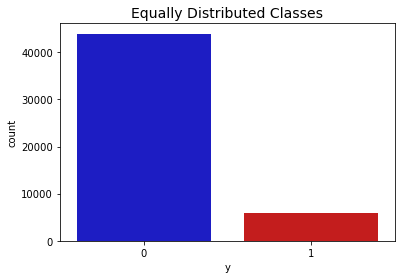

In [13]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['y'].value_counts()/len(new_df))

colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

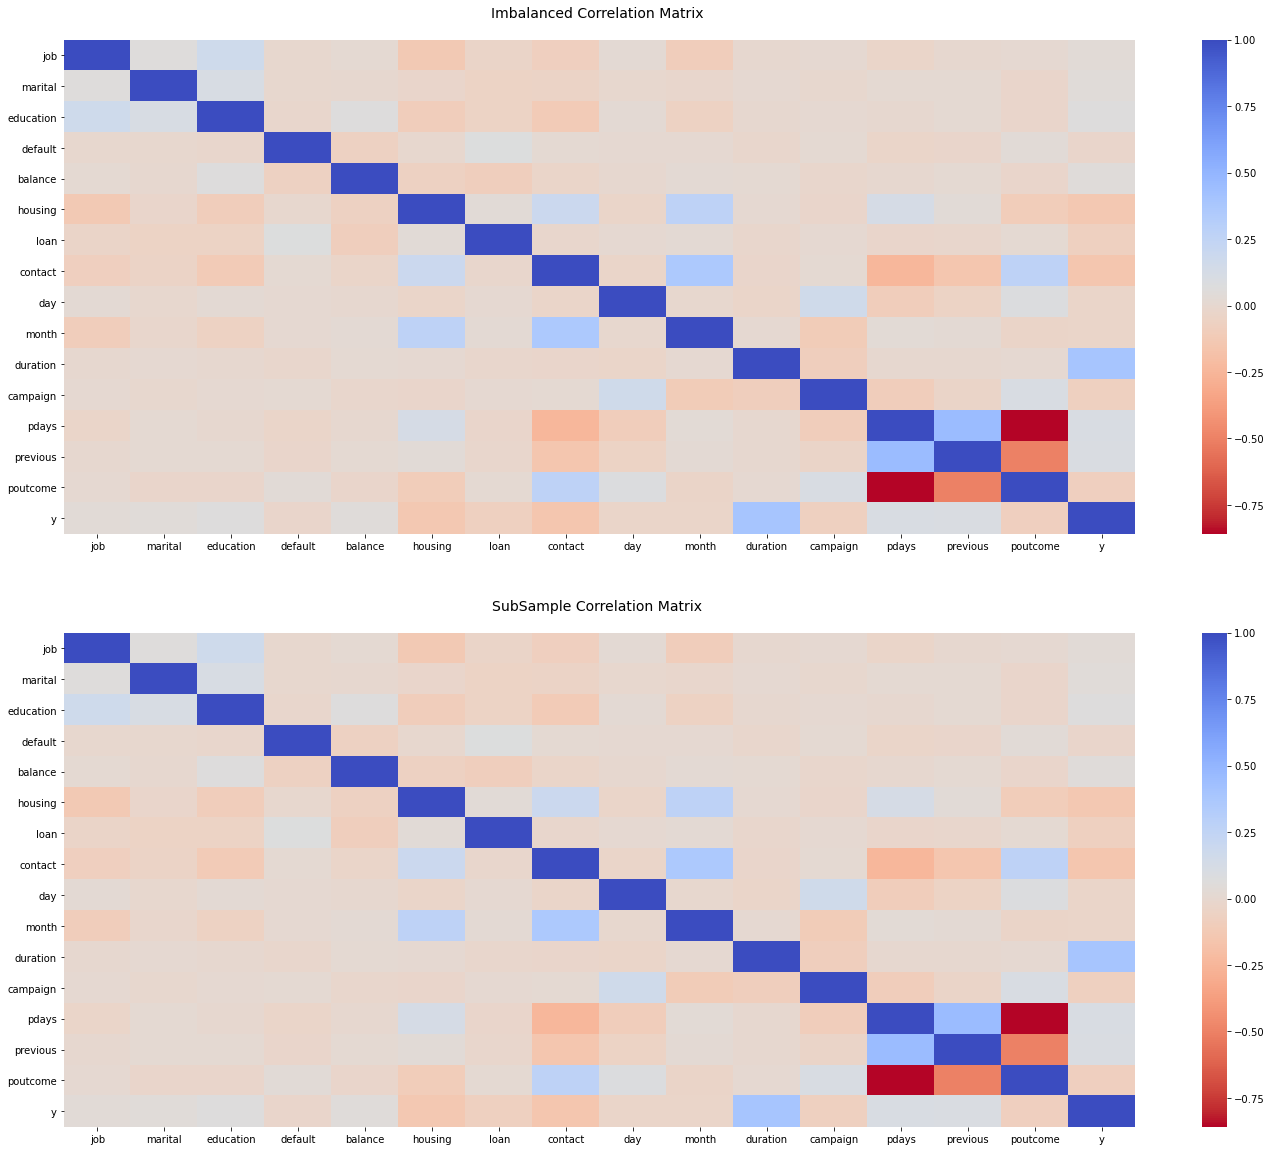

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n ", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n ', fontsize=14)
plt.show()

In [15]:
X = new_df.drop('y', axis=1)
y = new_df['y']



# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))



PCA took 0.13 s


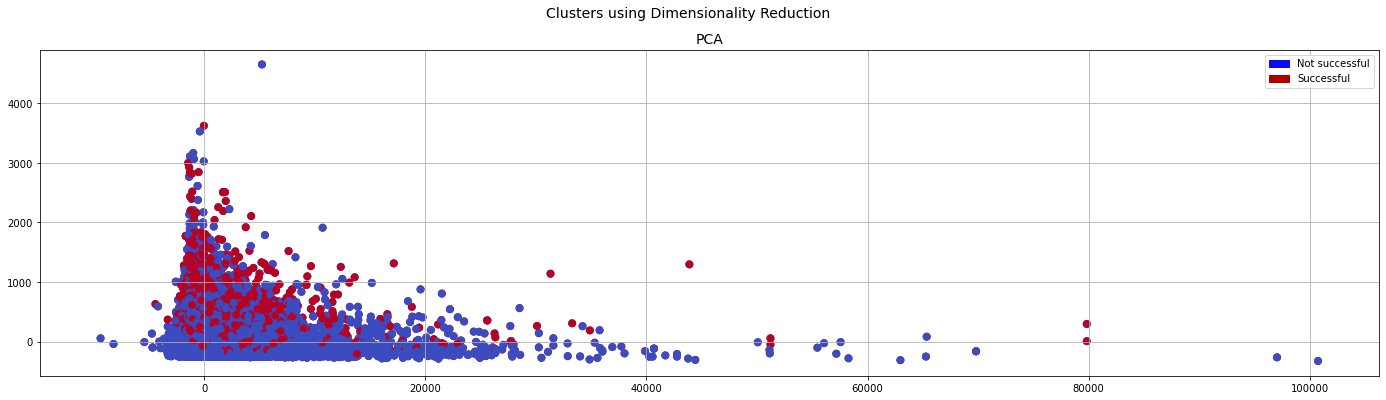

In [16]:

f, (ax1) = plt.subplots(1, 1, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not successful')
red_patch = mpatches.Patch(color='#AF0000', label='Successful')




# PCA scatter plot
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not successful', linewidths=2)
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Successful', linewidths=2)
ax1.set_title('PCA', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

plt.show()

In [17]:
X = new_df.drop('y', axis=1)
y = new_df['y']

In [18]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [20]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),

    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [21]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Classifiers:  LogisticRegression Has a training score of 89.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 88.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


In [22]:
 #Use GridSearchCV to find the best parameters.




# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_



C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [23]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


In [24]:

# Support Vector Classifier
#svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
#grid_svc = GridSearchCV(SVC(), svc_params)
#grid_svc.fit(X_train, y_train)

# SVC best estimator
#svc = grid_svc.best_estimator_

In [25]:


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [26]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

#svc_score = cross_val_score(svc, X_train, y_train, cv=5)
#print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Cross Validation Score:  88.7%
Knears Neighbors Cross Validation Score 88.49%
DecisionTree Classifier Cross Validation Score 89.06%


In [27]:
# We will undersample during cross validating
undersample_X = df1.drop('y', axis=1)
undersample_y = df1['y']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []


Train: [ 9724  9729  9734 ... 49728 49729 49730] Test: [   0    1    2 ... 9971 9972 9973]
Train: [    0     1     2 ... 49728 49729 49730] Test: [ 9724  9729  9734 ... 19907 19913 19932]
Train: [    0     1     2 ... 49728 49729 49730] Test: [19887 19888 19890 ... 29846 29847 29848]
Train: [    0     1     2 ... 49728 49729 49730] Test: [29769 29774 29800 ... 39939 39950 39959]
Train: [    0     1     2 ... 39939 39950 39959] Test: [39760 39761 39762 ... 49728 49729 49730]


In [28]:
# Let's Plot LogisticRegression Learning Curve


def plot_learning_curve(estimator1, estimator2, estimator3, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [29]:
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
#plot_learning_curve(log_reg, knears_neighbors, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [30]:

# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)



tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [31]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))

print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.8107350754432993
KNears Neighbors:  0.5822402117004325
Decision Tree Classifier:  0.6167092827931584


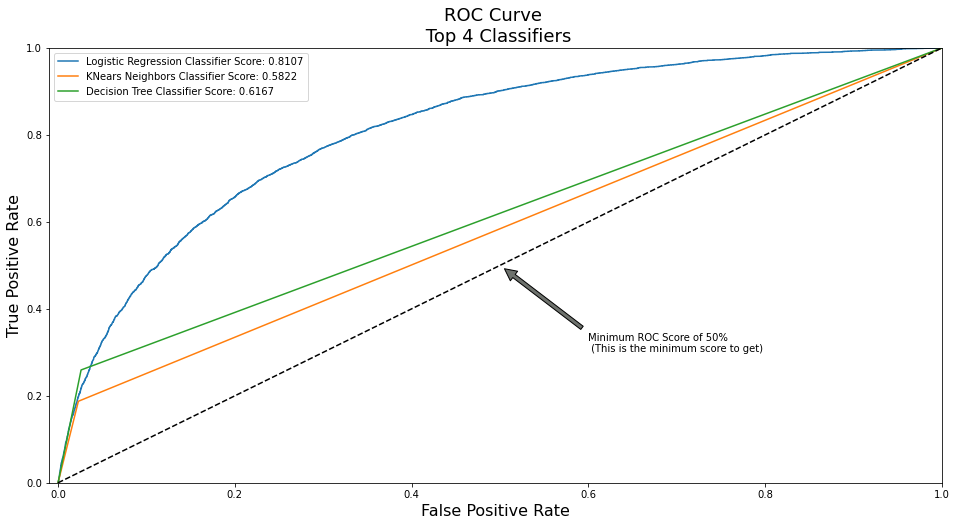

In [32]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()

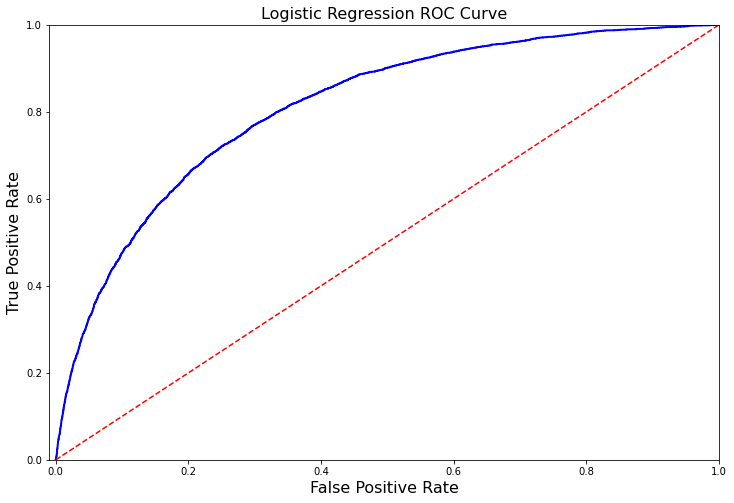

In [33]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [34]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [35]:

y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.16
Precision Score: 0.55
F1 Score: 0.24
Accuracy Score: 0.89
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: nan
Precision Score: nan
Recall Score: nan
F1 Score: nan
---------------------------------------------------------------------------------------------------------------------------------------


C:\Users\denis\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denis\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [36]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [37]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.37


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.37')

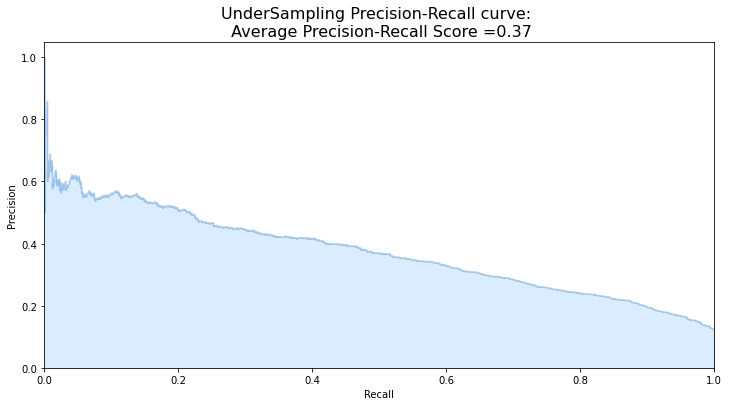

In [38]:

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [40]:


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 39784 | Length of y (train): 39784
Length of X (test): 9947 | Length of y (test): 9947


C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.8108032471922202
precision: 0.34276431470500934
recall: 0.6961915125136017
f1: 0.45929733475621
---------------------------------------------------------------------------------------------------------------------------------------


C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
labels = ['"no"', '"yes"']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

        "no"       0.95      0.82      0.88      8732
       "yes"       0.35      0.70      0.46      1215

    accuracy                           0.80      9947
   macro avg       0.65      0.76      0.67      9947
weighted avg       0.88      0.80      0.83      9947



In [42]:
y_score = best_est.decision_function(original_Xtest)

In [43]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.41


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.41')

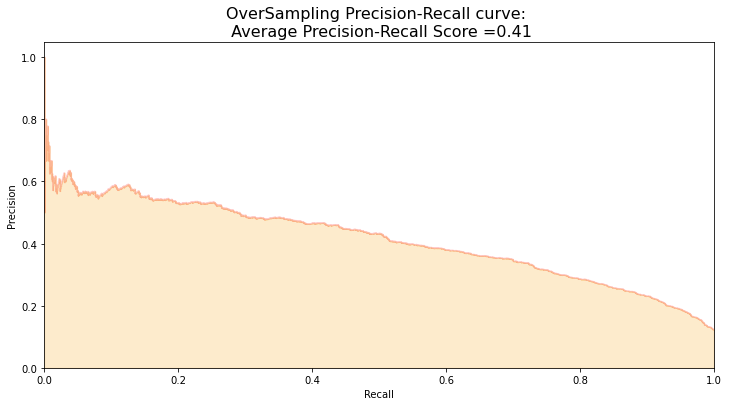

In [44]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [45]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
Xsm_train, ysm_train = sm.fit_resample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [46]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.6092755794525146 sec


C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


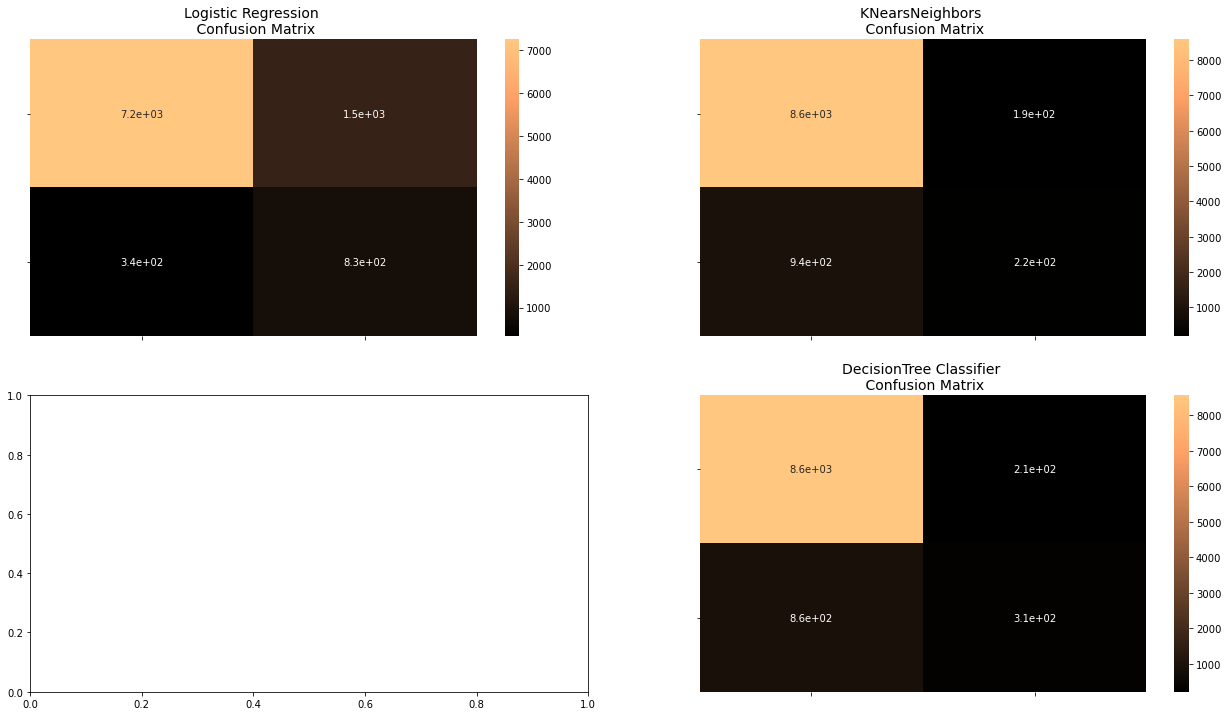

In [47]:

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)



sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [48]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))



print('Decition Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      8777
           1       0.35      0.71      0.47      1170

    accuracy                           0.81      9947
   macro avg       0.65      0.77      0.68      9947
weighted avg       0.88      0.81      0.84      9947

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8777
           1       0.54      0.19      0.28      1170

    accuracy                           0.89      9947
   macro avg       0.72      0.59      0.61      9947
weighted avg       0.86      0.89      0.86      9947

Decition Tree Classifier:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8777
           1       0.60      0.26      0.36      1170

    accuracy                           0.89      9947
   macro avg       0.75      0.62      0.65      9947
weighted 

In [49]:
# Final Score in the test set of logistic regression

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.812004
1,Oversampling (SMOTE),0.801347


In [50]:

df1.to_numpy()


# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(df1,df1.loc[: , 'y'], test_size=0.20,
                                                    random_state=5) # so we get the same results


In [51]:


# fitting a model
tree = DecisionTreeClassifier(max_depth=6)
_ = tree.fit(X_train, Y_train)

# Evaluate
print('Classification report:\n')
print(classification_report(Y_test, tree.predict(X_test)))


Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8798
           1       1.00      1.00      1.00      1149

    accuracy                           1.00      9947
   macro avg       1.00      1.00      1.00      9947
weighted avg       1.00      1.00      1.00      9947



In [52]:
def get_code(tree, feature_names, target_names, spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)
    
print('Decision tree:\n')

get_code(tree, list(df1.columns), df1.loc[: , 'y'])

Decision tree:

if ( y <= 0.5 ) {
    return 0 ( 35123 examples )
}
else {
    return 0 ( 4661 examples )
}


In [53]:

# Perform grid search
param_grid = [
    {'max_depth': [2, 3, 4, 5, 6],
     'criterion': ['entropy', 'gini'],
     'splitter': ['best', 'random']}
]
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, Y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
scoring = tree.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))
    
#for params, mean_score, scores in tree.cv_results_:
   # print("{:0.3f} (+/-{:0.03f}) for {}".format(
       #     mean_score, scores.std() * 2, params))

# Print best params
print('\nBest parameters:', tree.best_params_)

# Evaluate on held-out test
print('\nClassification report ({}):\n'.format(key))
print(classification_report(Y_test, tree.predict(X_test)))

Grid search mean and stdev:

1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 2, 'sp

In [54]:
logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)
# Calculate whether each test prediction is correct
l_yn = np.array([int(p==t) for p,t in zip(logreg.predict(X_test), Y_test)])
t_yn = np.array([int(p==t) for p,t in zip(tree.predict(X_test), Y_test)])

# There's very little difference in this data set
print(l_yn)
print(t_yn)

# We cannot reject H0. Accuracy is different but not reliably so.
# Therefore, we can select either classifier, e.g.,
# decision tree for interpretability.

print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

[1 1 0 ... 1 0 1]
[1 1 1 ... 1 1 1]
Classification report (DecisionTreeClassifier):

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8798
           1       0.69      0.35      0.46      1149

    accuracy                           0.91      9947
   macro avg       0.81      0.66      0.71      9947
weighted avg       0.89      0.91      0.89      9947



C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# load digits data
digits = load_digits()
X, y = df1.to_numpy(), df1.loc[: , 'y']
X_td, X_test, y_td, y_test = train_test_split(df1.to_numpy(), df1.loc[: , 'y'], test_size=0.25,
                                              random_state=5) # so we get the same results
X_train, X_dev, y_train, y_dev = train_test_split(X_td, y_td, test_size=0.33,
                                                  random_state=5) # so we get the same results
print()

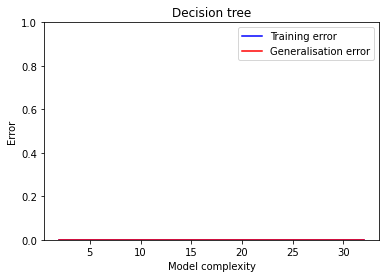

In [56]:
#Plot error vs complexity for decision tree


NUM_SAMPLES = 10
NUM_TRAIN_SETS = 10

def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = sum(train_errors)/len(train_errors)
    test_error = sum(test_errors)/len(test_errors)
    return train_error, test_error

complexities = []
train_errors = []
test_errors = []
for max_depth in [2,4,8,16,32,None]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(max_depth)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Decision tree')
plt.legend()
plt.show()

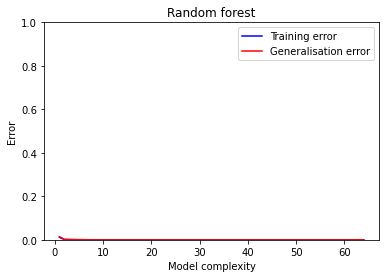

In [57]:
#Assessing decision tree fit

#Plot error vs complexity for random forest


complexities = []
train_errors = []
test_errors = []
for n_estimators in [1,2,4,8,16,32,64]:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=8)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(n_estimators)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Random forest')
plt.legend()
plt.show()

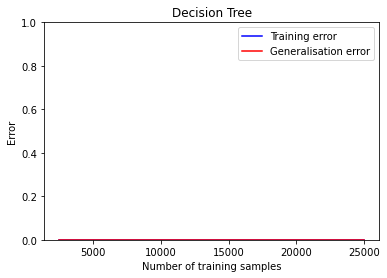

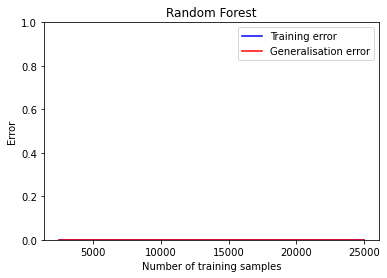

In [58]:
#Plot error vs number of training samples



def plot_error_curves(clf, X_train, y_train, X_test, y_test, num_train_sets=NUM_TRAIN_SETS, title=None):
    data_sizes = []
    train_errors = []
    test_errors = []
    for i in range(num_train_sets):
        sample_size = int(len(y_train) * (i+1)/num_train_sets)
        train_error, test_error = bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size)
        data_sizes.append(sample_size)
        train_errors.append(train_error)
        test_errors.append(test_error)
    plt.plot(data_sizes, train_errors, c='b', label='Training error')
    plt.plot(data_sizes, test_errors, c='r', label='Generalisation error')
    plt.ylim(0,1)
    plt.ylabel('Error')
    plt.xlabel('Number of training samples')
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

# Note that we're passing dev data for estimating generalisation error here, not test data
dt = DecisionTreeClassifier(max_depth=8)
plot_error_curves(dt, X_train, y_train, X_dev, y_dev, title='Decision Tree')
rf = RandomForestClassifier(max_depth=8, n_estimators=16)
plot_error_curves(rf, X_train, y_train, X_dev, y_dev, title='Random Forest')

In [59]:

def cols_from_rows(data):
    cols = [[] for _ in data[0]] # init with empty list for each column
    for row in data:
        for i, val in enumerate(row):
            cols[i].append(val)
    return cols

print('Descriptive stats for feature values:')
cols = cols_from_rows(df1.to_numpy())
print('-'*75)
print('{:20} {:>10} {:>10} {:>10} {:>10} {:>10}'.format('Name', 'Min', 'Max', 'Mean', 'Stdev', 'Median'))
print('-'*75)
for i, col in enumerate(cols):
    print('{:20} {:10.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'\
          .format(df1.loc[: , 'y'][i], min(col), max(col), np.mean(col), np.std(col), np.median(col)))
print('-'*75)
    


Descriptive stats for feature values:
---------------------------------------------------------------------------
Name                        Min        Max       Mean      Stdev     Median
---------------------------------------------------------------------------
                   0       0.00      11.00       4.35       3.27       4.00
                   0       0.00       2.00       1.17       0.61       1.00
                   0       0.00       3.00       1.23       0.75       1.00
                   0       0.00       1.00       0.02       0.13       0.00
                   0   -8019.00  102127.00    1367.75    3041.61     448.00
                   0       0.00       1.00       0.56       0.50       1.00
                   0       0.00       1.00       0.16       0.37       0.00
                   0       0.00       2.00       0.64       0.90       0.00
                   0       1.00      31.00      15.82       8.32      16.00
                   0       0.00      11.00       5

In [60]:
#Logistic regression 

# train and test split
X_train, X_test, Y_train, Y_test = train_test_split(df1.to_numpy(), df1.loc[: , 'y'], test_size=0.33,
                                                    random_state=5) # so we get the same results


logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)
print('Intercept:', logreg.intercept_)
print('Coefficients:\n', logreg.coef_)

# We can predict the type of new organisms given measurements
print('\nPredicted type of first five organisms from test split:', logreg.predict(X_test)[:5])
print('Actual type of first five organisms from test split:', Y_test[:5])

Intercept: [-0.21258745]
Coefficients:
 [[ 1.35328111e-02 -1.50250885e-01 -8.35523219e-02 -9.14761727e-03
   1.03839555e-05 -2.91294572e-01 -1.02031401e-01 -3.02705536e-01
  -2.00690510e-02  5.91665691e-02  2.97745025e-03 -4.63445205e-01
  -3.82579890e-03  7.81424169e-02 -5.20521813e-01  8.49450860e-01]]

Predicted type of first five organisms from test split: [0 0 0 0 0]
Actual type of first five organisms from test split: 7233     0
18805    0
43624    1
6531     0
12682    0
Name: y, dtype: int8


C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
#Evaluating classification


from sklearn.metrics import classification_report
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(df1.loc[: , 'y'])])
# print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     14528
           1       0.74      0.29      0.42      1884

    accuracy                           0.91     16412
   macro avg       0.82      0.64      0.68     16412
weighted avg       0.89      0.91      0.89     16412



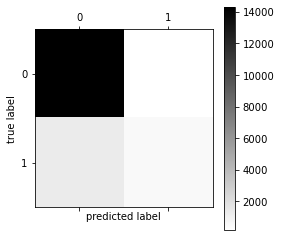

In [62]:

# print('Confusion matrix ({}):\n'.format(key))
_ = plt.matshow(confusion_matrix(Y_test, logreg.predict(X_test)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

In [63]:
warnings.filterwarnings('ignore')

param_grid = [
    {'C': [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty': ['l1', 'l2']}
]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)

# print(logreg.cv_results_[{'mean_test_score','std_test_score','params'}])
scoring = logreg.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))


nan (+/-nan) for {'C': 1, 'penalty': 'l1'}
0.906 (+/-0.008) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10, 'penalty': 'l1'}
0.908 (+/-0.010) for {'C': 10, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100, 'penalty': 'l1'}
0.920 (+/-0.064) for {'C': 100, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000, 'penalty': 'l1'}
0.908 (+/-0.012) for {'C': 1000, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000.0, 'penalty': 'l1'}
0.908 (+/-0.012) for {'C': 10000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100000.0, 'penalty': 'l1'}
0.908 (+/-0.012) for {'C': 100000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000000.0, 'penalty': 'l1'}
0.908 (+/-0.012) for {'C': 1000000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000000.0, 'penalty': 'l1'}
0.908 (+/-0.011) for {'C': 10000000.0, 'penalty': 'l2'}


In [64]:

warnings.filterwarnings('ignore')

# Perform grid search
param_grid = [
    {'C': [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty': ['l1', 'l2']}
]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
scoring = logreg.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))


# Print best params
print('\nBest parameters:', logreg.best_params_)

# print('\nClassification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

Grid search mean and stdev:

nan (+/-nan) for {'C': 1, 'penalty': 'l1'}
0.906 (+/-0.008) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10, 'penalty': 'l1'}
0.908 (+/-0.010) for {'C': 10, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100, 'penalty': 'l1'}
0.920 (+/-0.064) for {'C': 100, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000, 'penalty': 'l1'}
0.908 (+/-0.012) for {'C': 1000, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000.0, 'penalty': 'l1'}
0.908 (+/-0.012) for {'C': 10000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100000.0, 'penalty': 'l1'}
0.908 (+/-0.012) for {'C': 100000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000000.0, 'penalty': 'l1'}
0.908 (+/-0.012) for {'C': 1000000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000000.0, 'penalty': 'l1'}
0.908 (+/-0.011) for {'C': 10000000.0, 'penalty': 'l2'}

Best parameters: {'C': 100, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14528
           1       0.71 

In [65]:

df2['job']=df2['job'].astype('category').cat.codes
df2['marital']=df2['marital'].astype('category').cat.codes
df2['education']=df2['education'].astype('category').cat.codes
df2['default']=df2['default'].astype('category').cat.codes
df2['housing']=df2['housing'].astype('category').cat.codes
df2['loan']=df2['loan'].astype('category').cat.codes
df2['contact']=df2['contact'].astype('category').cat.codes
df2['month']=df2['month'].astype('category').cat.codes
df2['day_of_week']=df2['day_of_week'].astype('category').cat.codes
df2['poutcome']=df2['poutcome'].astype('category').cat.codes
df2['y']=df2['y'].astype('category').cat.codes


In [66]:


print('No', round(df2['y'].value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('Yes', round(df2['y'].value_counts()[1]/len(df1) * 100,2), '% of the dataset')

X = df2.drop('y', axis=1)
y = df2['y']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No 80.87 % of the dataset
Yes 10.24 % of the dataset
Train: [ 8619  8620  8621 ... 45303 45304 45305] Test: [    0     1     2 ... 18700 18709 18710]
Train: [    0     1     2 ... 45303 45304 45305] Test: [ 8619  8620  8621 ... 32742 32743 32745]
Train: [    0     1     2 ... 45303 45304 45305] Test: [17002 17003 17004 ... 40790 40791 40793]
Train: [    0     1     2 ... 45303 45304 45305] Test: [25594 25595 25596 ... 43329 43330 43331]
Train: [    0     1     2 ... 43329 43330 43331] Test: [34509 34510 34512 ... 45303 45304 45305]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.88798146 0.11201854]
[0.88622821 0.11377179]


In [67]:
df2 = df2.sample(frac=1)
df2.head()

successful_df1 = df2.loc[df1['y'] == 1]


not_successful_df1 = df2.loc[df1['y'] == 0]

skew_distributed_df1 = pd.concat([successful_df1, not_successful_df1])

# Shuffle dataframe rows
new_df1 = skew_distributed_df1.sample(frac=1, random_state=42)

new_df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6844,33,1,1,2,0,2,2,1,6,4,...,2,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0
18623,38,7,2,6,0,0,0,0,3,3,...,4,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0
20260,46,9,1,2,1,2,0,0,3,3,...,1,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0
24183,37,0,1,6,1,2,0,0,1,1,...,1,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0
34307,41,9,0,5,0,1,1,0,0,2,...,1,999,0,1,-1.8,93.075,-47.1,1.365,5099.1,1


Distribution of the Classes in the subsample dataset
y
0    0.887631
1    0.112369
Name: count, dtype: float64


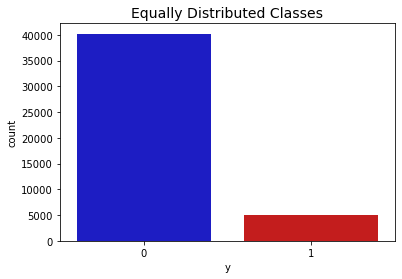

In [68]:
print('Distribution of the Classes in the subsample dataset')
print(new_df1['y'].value_counts()/len(new_df1))

colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=new_df1, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

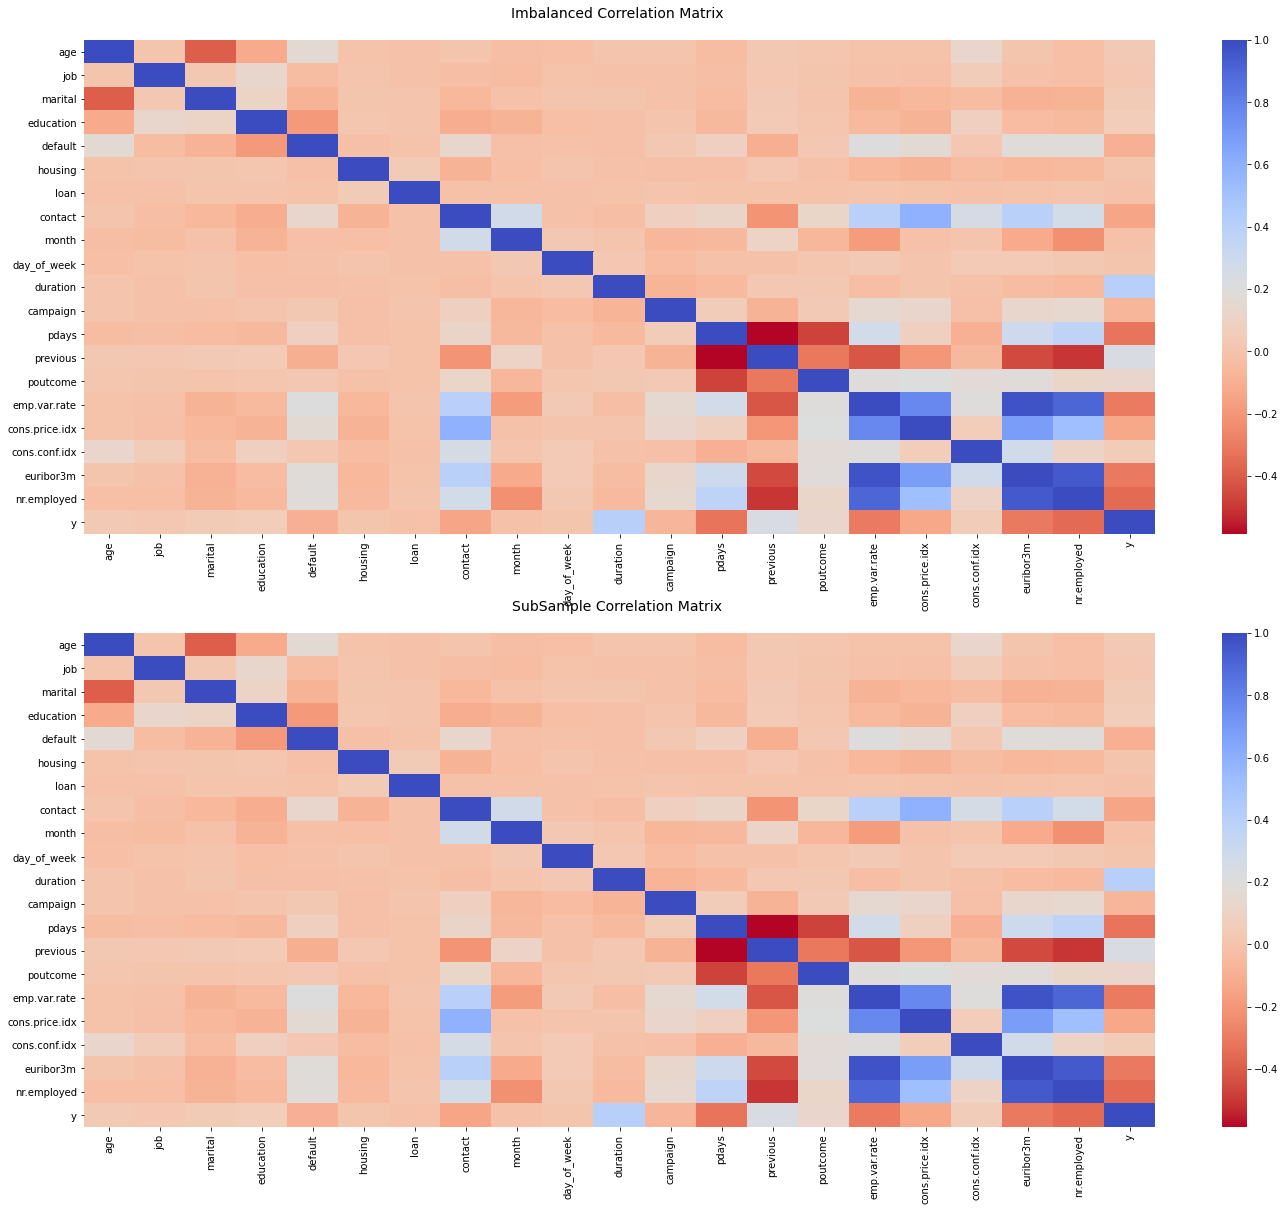

In [69]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df2.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n ", fontsize=14)


sub_sample_corr = new_df1.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n ', fontsize=14)
plt.show()

In [70]:
X = new_df1.drop('y', axis=1)
y = new_df1['y']



# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))



PCA took 0.13 s


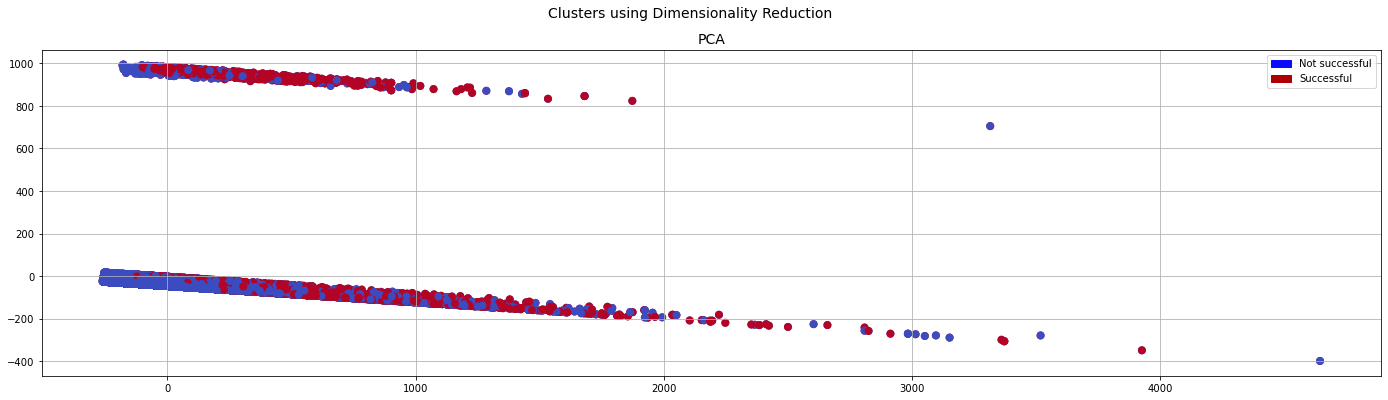

In [71]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not successful')
red_patch = mpatches.Patch(color='#AF0000', label='Successful')




# PCA scatter plot
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not successful', linewidths=2)
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Successful', linewidths=2)
ax1.set_title('PCA', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

plt.show()

In [72]:
X = new_df1.drop('y', axis=1)
y = new_df1['y']

In [73]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [75]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [76]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 91.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 91.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [77]:
 #Use GridSearchCV to find the best parameters.




# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_



In [78]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


In [79]:

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [80]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')


tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  90.89%
Knears Neighbors Cross Validation Score 90.67%
DecisionTree Classifier Cross Validation Score 90.83%


In [81]:
# We will undersample during cross validating
undersample_X = df1.drop('y', axis=1)
undersample_y = df1['y']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []


Train: [ 9724  9729  9734 ... 49728 49729 49730] Test: [   0    1    2 ... 9971 9972 9973]
Train: [    0     1     2 ... 49728 49729 49730] Test: [ 9724  9729  9734 ... 19907 19913 19932]
Train: [    0     1     2 ... 49728 49729 49730] Test: [19887 19888 19890 ... 29846 29847 29848]
Train: [    0     1     2 ... 49728 49729 49730] Test: [29769 29774 29800 ... 39939 39950 39959]
Train: [    0     1     2 ... 39939 39950 39959] Test: [39760 39761 39762 ... 49728 49729 49730]


In [82]:
# Let's Plot LogisticRegression Learning Curve


def plot_learning_curve(estimator1, estimator2, estimator3, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [83]:

# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)


tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [84]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))

print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.924293322821365
KNears Neighbors:  0.6811811165228423
Decision Tree Classifier:  0.7670421453264366


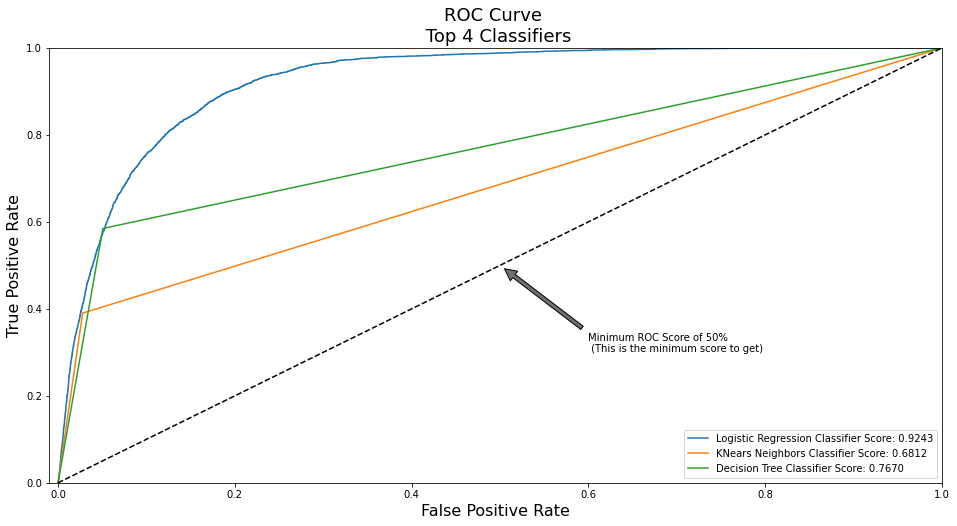

In [85]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)

tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr,  tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr,  tree_fpr, tree_tpr)
plt.show()

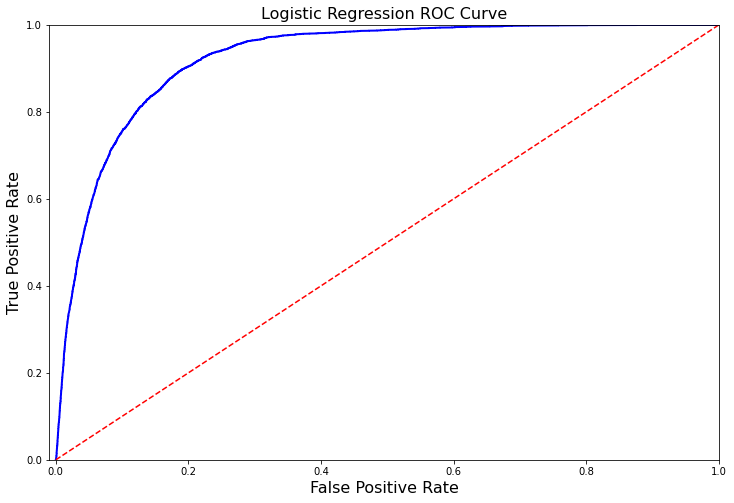

In [86]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [87]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [88]:

y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.40
Precision Score: 0.66
F1 Score: 0.50
Accuracy Score: 0.91
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: nan
Precision Score: nan
Recall Score: nan
F1 Score: nan
---------------------------------------------------------------------------------------------------------------------------------------


In [89]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [90]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.59


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.59')

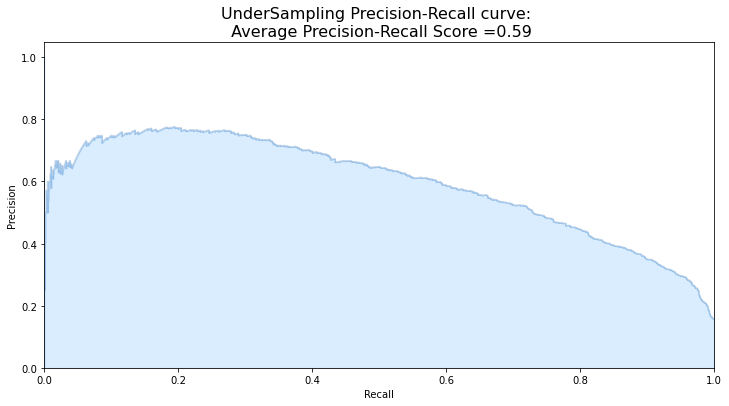

In [91]:

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [92]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 36244 | Length of y (train): 36244
Length of X (test): 9062 | Length of y (test): 9062
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.8494647697467291
precision: 0.41722944268108286
recall: 0.8645320197044336
f1: 0.5627764256252774
---------------------------------------------------------------------------------------------------------------------------------------


In [93]:
labels = ['"no"', '"yes"']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

        "no"       0.98      0.85      0.91      8031
       "yes"       0.42      0.84      0.56      1031

    accuracy                           0.85      9062
   macro avg       0.70      0.85      0.73      9062
weighted avg       0.91      0.85      0.87      9062



In [94]:
y_score = best_est.decision_function(original_Xtest)

In [95]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.58


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.58')

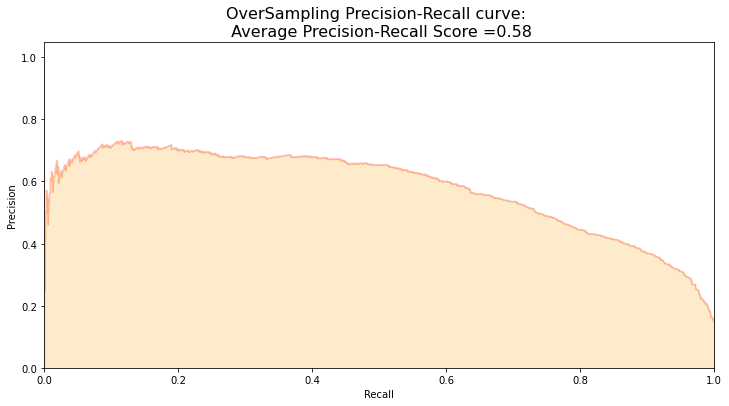

In [96]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [97]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
Xsm_train, ysm_train = sm.fit_resample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [98]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.54604172706604 sec


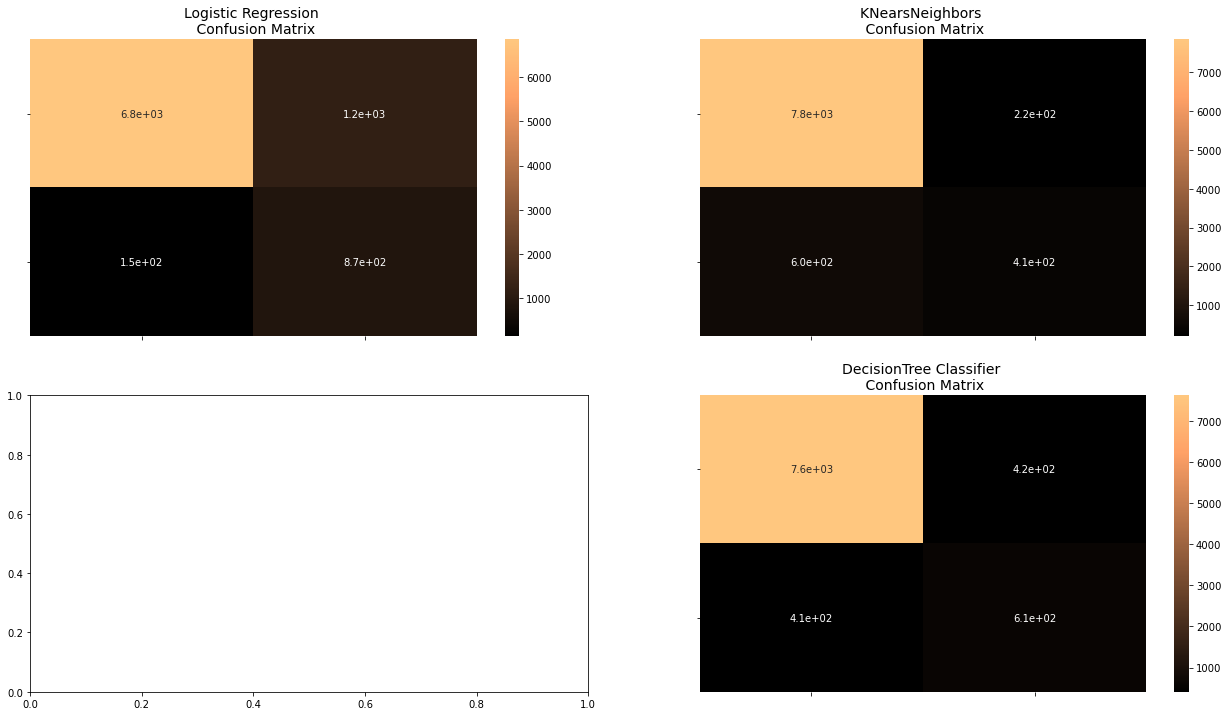

In [99]:

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)

y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)

tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [100]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))


print('Decition Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8046
           1       0.42      0.86      0.56      1016

    accuracy                           0.85      9062
   macro avg       0.70      0.85      0.74      9062
weighted avg       0.92      0.85      0.87      9062

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8046
           1       0.66      0.40      0.50      1016

    accuracy                           0.91      9062
   macro avg       0.79      0.69      0.73      9062
weighted avg       0.90      0.91      0.90      9062

Decition Tree Classifier:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8046
           1       0.59      0.60      0.59      1016

    accuracy                           0.91      9062
   macro avg       0.77      0.77      0.77      9062
weighted 

In [101]:
# Final Score in the test set of logistic regression

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.851909
1,Oversampling (SMOTE),0.848047


In [102]:

df2.to_numpy()


# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(df1,df1.loc[: , 'y'], test_size=0.20,
                                                    random_state=5) # so we get the same results


In [103]:

# fitting a model
tree = DecisionTreeClassifier(max_depth=6)
_ = tree.fit(X_train, Y_train)

# Evaluate
print('Classification report:\n')
print(classification_report(Y_test, tree.predict(X_test)))

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8798
           1       1.00      1.00      1.00      1149

    accuracy                           1.00      9947
   macro avg       1.00      1.00      1.00      9947
weighted avg       1.00      1.00      1.00      9947



In [104]:
def get_code(tree, feature_names, target_names, spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)
    
print('Decision tree:\n')

get_code(tree, list(df1.columns), df1.loc[: , 'y'])

Decision tree:

if ( y <= 0.5 ) {
    return 0 ( 35123 examples )
}
else {
    return 0 ( 4661 examples )
}


In [105]:

# Perform grid search
param_grid = [
    {'max_depth': [2, 3, 4, 5, 6],
     'criterion': ['entropy', 'gini'],
     'splitter': ['best', 'random']}
]
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, Y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
scoring = tree.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))
    
#for params, mean_score, scores in tree.cv_results_:
   # print("{:0.3f} (+/-{:0.03f}) for {}".format(
       #     mean_score, scores.std() * 2, params))

# Print best params
print('\nBest parameters:', tree.best_params_)

# Evaluate on held-out test
print('\nClassification report ({}):\n'.format(key))
print(classification_report(Y_test, tree.predict(X_test)))

Grid search mean and stdev:

1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 2, 'sp

In [106]:
logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)
# Calculate whether each test prediction is correct
l_yn = np.array([int(p==t) for p,t in zip(logreg.predict(X_test), Y_test)])
t_yn = np.array([int(p==t) for p,t in zip(tree.predict(X_test), Y_test)])

# There's very little difference in this data set
print(l_yn)
print(t_yn)

# We cannot reject H0. Accuracy is different but not reliably so.
# Therefore, we can select either classifier, e.g.,
# decision tree for interpretability.

print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

[1 1 0 ... 1 0 1]
[1 1 1 ... 1 1 1]
Classification report (DecisionTreeClassifier):

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8798
           1       0.69      0.35      0.46      1149

    accuracy                           0.91      9947
   macro avg       0.81      0.66      0.71      9947
weighted avg       0.89      0.91      0.89      9947



In [111]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# load digits data
digits = load_digits()
X, y = df2.to_numpy(), df2.loc[: , 'y']
X_td, X_test, y_td, y_test = train_test_split(df2.to_numpy(), df2.loc[: , 'y'], test_size=0.25,
                                              random_state=5) # so we get the same results
X_train, X_dev, y_train, y_dev = train_test_split(X_td, y_td, test_size=0.33,
                                                  random_state=5) # so we get the same results
print()

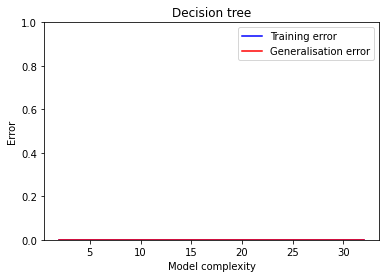

In [112]:
#Plot error vs complexity for decision tree


NUM_SAMPLES = 10
NUM_TRAIN_SETS = 10

def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = sum(train_errors)/len(train_errors)
    test_error = sum(test_errors)/len(test_errors)
    return train_error, test_error

complexities = []
train_errors = []
test_errors = []
for max_depth in [2,4,8,16,32,None]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(max_depth)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Decision tree')
plt.legend()
plt.show()

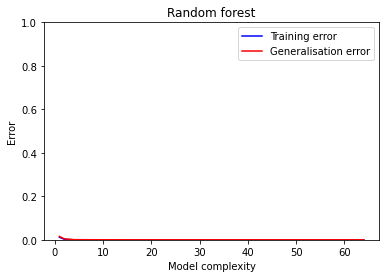

In [113]:
#Assessing decision tree fit

#Plot error vs complexity for random forest


complexities = []
train_errors = []
test_errors = []
for n_estimators in [1,2,4,8,16,32,64]:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=8)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(n_estimators)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Random forest')
plt.legend()
plt.show()

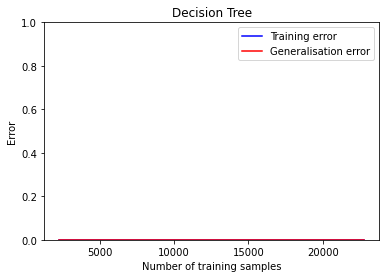

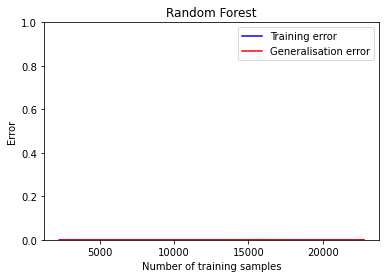

In [114]:
#Plot error vs number of training samples



def plot_error_curves(clf, X_train, y_train, X_test, y_test, num_train_sets=NUM_TRAIN_SETS, title=None):
    data_sizes = []
    train_errors = []
    test_errors = []
    for i in range(num_train_sets):
        sample_size = int(len(y_train) * (i+1)/num_train_sets)
        train_error, test_error = bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size)
        data_sizes.append(sample_size)
        train_errors.append(train_error)
        test_errors.append(test_error)
    plt.plot(data_sizes, train_errors, c='b', label='Training error')
    plt.plot(data_sizes, test_errors, c='r', label='Generalisation error')
    plt.ylim(0,1)
    plt.ylabel('Error')
    plt.xlabel('Number of training samples')
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

# Note that we're passing dev data for estimating generalisation error here, not test data
dt = DecisionTreeClassifier(max_depth=8)
plot_error_curves(dt, X_train, y_train, X_dev, y_dev, title='Decision Tree')
rf = RandomForestClassifier(max_depth=8, n_estimators=16)
plot_error_curves(rf, X_train, y_train, X_dev, y_dev, title='Random Forest')

In [115]:

def cols_from_rows(data):
    cols = [[] for _ in data[0]] # init with empty list for each column
    for row in data:
        for i, val in enumerate(row):
            cols[i].append(val)
    return cols

print('Descriptive stats for feature values:')
cols = cols_from_rows(df1.to_numpy())
print('-'*75)
print('{:20} {:>10} {:>10} {:>10} {:>10} {:>10}'.format('Name', 'Min', 'Max', 'Mean', 'Stdev', 'Median'))
print('-'*75)
for i, col in enumerate(cols):
    print('{:20} {:10.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'\
          .format(df2.loc[: , 'y'][i], min(col), max(col), np.mean(col), np.std(col), np.median(col)))
print('-'*75)
    

Descriptive stats for feature values:
---------------------------------------------------------------------------
Name                        Min        Max       Mean      Stdev     Median
---------------------------------------------------------------------------
                   0       0.00      11.00       4.35       3.27       4.00
                   0       0.00       2.00       1.17       0.61       1.00
                   0       0.00       3.00       1.23       0.75       1.00
                   0       0.00       1.00       0.02       0.13       0.00
                   0   -8019.00  102127.00    1367.75    3041.61     448.00
                   0       0.00       1.00       0.56       0.50       1.00
                   0       0.00       1.00       0.16       0.37       0.00
                   0       0.00       2.00       0.64       0.90       0.00
                   0       1.00      31.00      15.82       8.32      16.00
                   0       0.00      11.00       5

In [116]:
#Logistic regression 

# train and test split
X_train, X_test, Y_train, Y_test = train_test_split(df2.to_numpy(), df2.loc[: ,'y'], test_size=0.33,
                                                    random_state=5) # so we get the same results


logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)
print('Intercept:', logreg.intercept_)
print('Coefficients:\n', logreg.coef_)

# We can predict the type of new organisms given measurements
print('\nPredicted type of first five organisms from test split:', logreg.predict(X_test)[:5])
print('Actual type of first five organisms from test split:', Y_test[:5])

Intercept: [0.00317899]
Coefficients:
 [[-0.00170225 -0.03287182  0.0345871   0.095687   -0.03702404  0.00251995
  -0.01426177 -0.0549575  -0.10208637  0.0341708   0.00422183 -0.0713448
  -0.00057596  0.00586572  0.0159588  -0.29960692  0.25550821  0.04965945
  -0.31814571 -0.00469845  0.46696452]]

Predicted type of first five organisms from test split: [0 0 0 0 0]
Actual type of first five organisms from test split: 9338     0
18453    0
16828    0
39866    0
35304    0
Name: y, dtype: int8


In [117]:
#Evaluating classification


from sklearn.metrics import classification_report
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(df2.loc[: , 'y'])])
# print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     13321
           1       0.75      0.38      0.50      1630

    accuracy                           0.92     14951
   macro avg       0.84      0.68      0.73     14951
weighted avg       0.91      0.92      0.91     14951



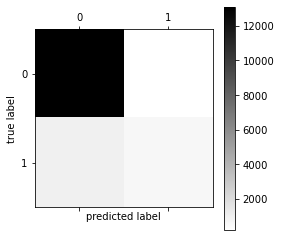

In [118]:
# print('Confusion matrix ({}):\n'.format(key))
_ = plt.matshow(confusion_matrix(Y_test, logreg.predict(X_test)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

In [119]:
warnings.filterwarnings('ignore')

param_grid = [
    {'C': [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty': ['l1', 'l2']}
]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)

# print(logreg.cv_results_[{'mean_test_score','std_test_score','params'}])
scoring = logreg.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))


nan (+/-nan) for {'C': 1, 'penalty': 'l1'}
0.926 (+/-0.022) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10, 'penalty': 'l1'}
0.929 (+/-0.020) for {'C': 10, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100, 'penalty': 'l1'}
0.926 (+/-0.020) for {'C': 100, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000, 'penalty': 'l1'}
0.928 (+/-0.021) for {'C': 1000, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000.0, 'penalty': 'l1'}
0.927 (+/-0.023) for {'C': 10000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100000.0, 'penalty': 'l1'}
0.928 (+/-0.025) for {'C': 100000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000000.0, 'penalty': 'l1'}
0.927 (+/-0.026) for {'C': 1000000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000000.0, 'penalty': 'l1'}
0.928 (+/-0.026) for {'C': 10000000.0, 'penalty': 'l2'}


In [120]:
warnings.filterwarnings('ignore')

# Perform grid search
param_grid = [
    {'C': [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty': ['l1', 'l2']}
]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
scoring = logreg.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))


# Print best params
print('\nBest parameters:', logreg.best_params_)

# print('\nClassification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

Grid search mean and stdev:

nan (+/-nan) for {'C': 1, 'penalty': 'l1'}
0.926 (+/-0.022) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10, 'penalty': 'l1'}
0.929 (+/-0.020) for {'C': 10, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100, 'penalty': 'l1'}
0.926 (+/-0.020) for {'C': 100, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000, 'penalty': 'l1'}
0.928 (+/-0.021) for {'C': 1000, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000.0, 'penalty': 'l1'}
0.927 (+/-0.023) for {'C': 10000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100000.0, 'penalty': 'l1'}
0.928 (+/-0.025) for {'C': 100000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000000.0, 'penalty': 'l1'}
0.927 (+/-0.026) for {'C': 1000000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000000.0, 'penalty': 'l1'}
0.928 (+/-0.026) for {'C': 10000000.0, 'penalty': 'l2'}

Best parameters: {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13321
           1       0.67  